***
# FISHER IRIS CLASSIFICATION
***
***
author --- louis tomczyk<br>
institution --- Xidian University<br>
student id --- 211.561.13.752<br>
date --- 2021.11.21<br>
course --- X2 CS 10 26 - Machine Learning<br>
contact --- <louis.tomczyk.work@gmail.com><br>
bibliography --- <br>
- __[Scikit-learn : Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)__
- __[Scikit-learn : Train Test Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)__
- __[Scikit-learn : One Vs One Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html)__
- __[Scikit-learn : Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)__
- __[Scikit-learn : K-Nearest Neighbours](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)__
- __[Scikit-learn : Multi-Layers Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)__
- __[Scikit-learn : Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)__
- __[Stack-Overflow : Confusion Matrix display](https://stackoverflow.com/questions/61016110/plot-multiple-confusion-matrices-with-plot-confusion-matrix)__
***

## 0/ Maintenance
***

### General packages

In [1]:
# basic maths
import numpy as np

# ploting
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# tools for arrays etc.
import pandas as pd

# importing Fisher Iris dataset
from sklearn.datasets import load_iris

# Performance evaluation metris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import f1_score as f1

# splitting data for k-fold validation
from sklearn.model_selection import train_test_split

# other tools
from sklearn.multiclass import OneVsRestClassifier

# re-scaling values
from sklearn.preprocessing import StandardScaler


### Plot parameters

In [2]:
fig_width       = 10
fig_height      = fig_width/1.618
fig_resolution  = fig_width*fig_height


plt.rcParams['figure.figsize']  = (fig_width, fig_height*2)
plt.rcParams['figure.dpi']      = fig_resolution*2
plt.rcParams['font.weight']     = "normal"
plt.rcParams['axes.labelweight']= "bold"
plt.rcParams['axes.linewidth']  = "0.1"
plt.rcParams["axes.titlesize"]  = "20"
plt.rcParams["axes.labelsize"]  = "12"
plt.rcParams["axes.titleweight"]= "bold"

draw_plot = 1

### Loading data

In [3]:
#   return_X_y = True :
#       X = the data
#       y = the targets
#   as_frame :
#       the values are represented as Pandas DataFrames

X,y         = load_iris(return_X_y=True,as_frame=True)
colors      = np.array(y)
class_names = ["setosa","versicolor","virginica"]

## 1/ Data Importation
***

In [4]:
# showing the first lines of the data
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
SL = X["sepal length (cm)"]
SW = X["sepal width (cm)"]
PL = X["petal length (cm)"]
PW = X["petal width (cm)"]

## 2/ Data analysis
***

### Visualisation of raw data

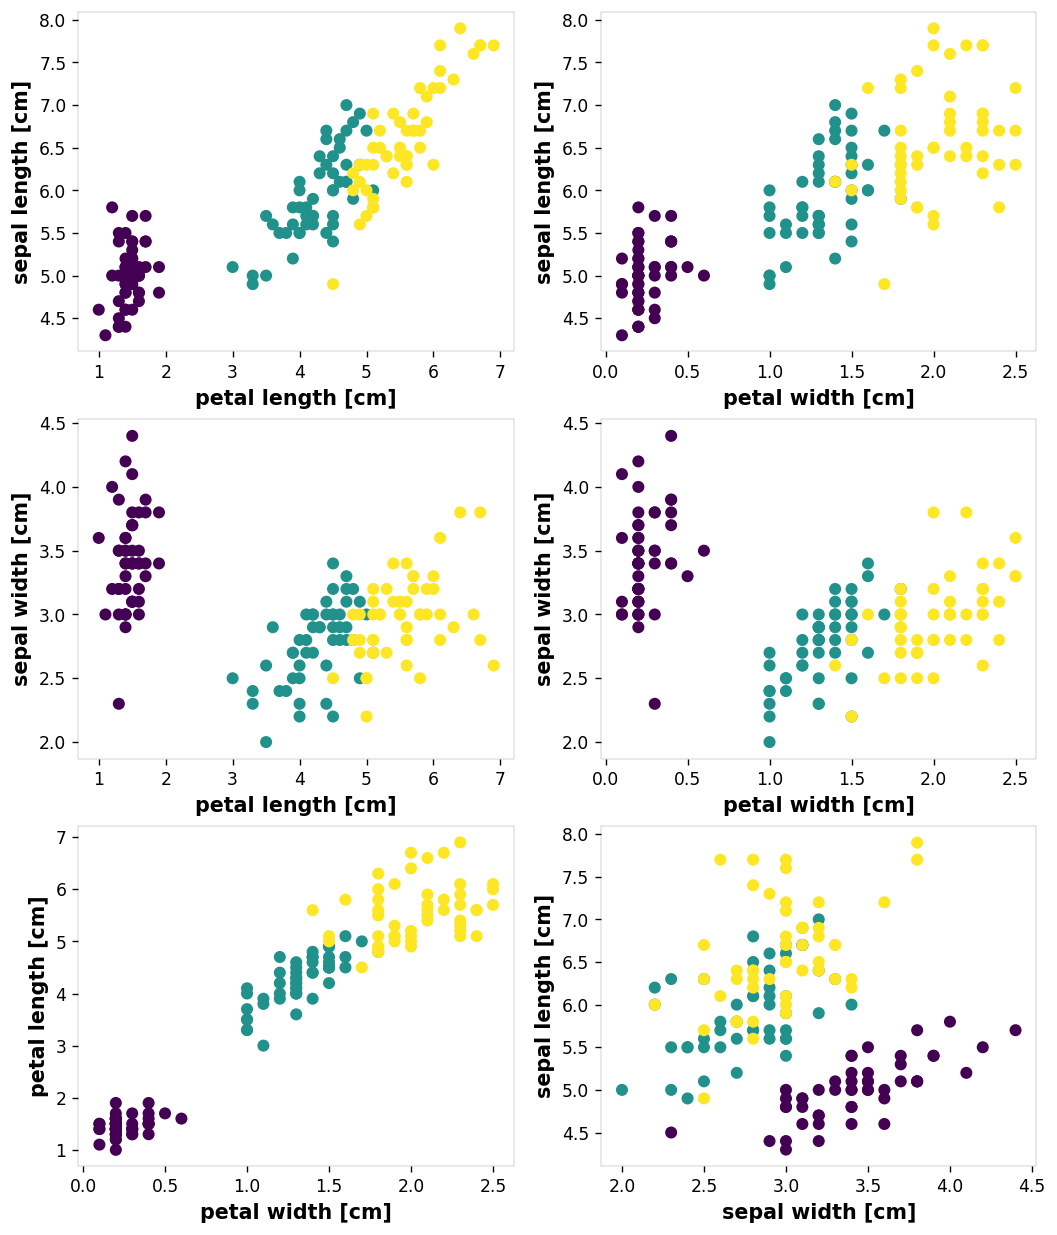

In [6]:
if draw_plot ==1:
    plt.subplot(3,2,1)
    plt.scatter(PL,SL,c=colors)
    plt.xlabel("petal length [cm]")
    plt.ylabel("sepal length [cm]")

    plt.subplot(3,2,2)
    plt.scatter(PW,SL,c=colors)
    plt.xlabel("petal width [cm]")
    plt.ylabel("sepal length [cm]")

    plt.subplot(3,2,3)
    plt.scatter(PL,SW,c=colors)
    plt.xlabel("petal length [cm]")
    plt.ylabel("sepal width [cm]")

    plt.subplot(3,2,4)
    plt.scatter(PW,SW,c=colors)
    plt.xlabel("petal width [cm]")
    plt.ylabel("sepal width [cm]")

    plt.subplot(3,2,5)
    plt.scatter(PW,PL,c=colors)
    plt.xlabel("petal width [cm]")
    plt.ylabel("petal length [cm]")

    plt.subplot(3,2,6)
    plt.scatter(SW,SL,c=colors)
    plt.xlabel("sepal width [cm]")
    plt.ylabel("sepal length [cm]")

    plt.show()

### Visualisation of the statistics

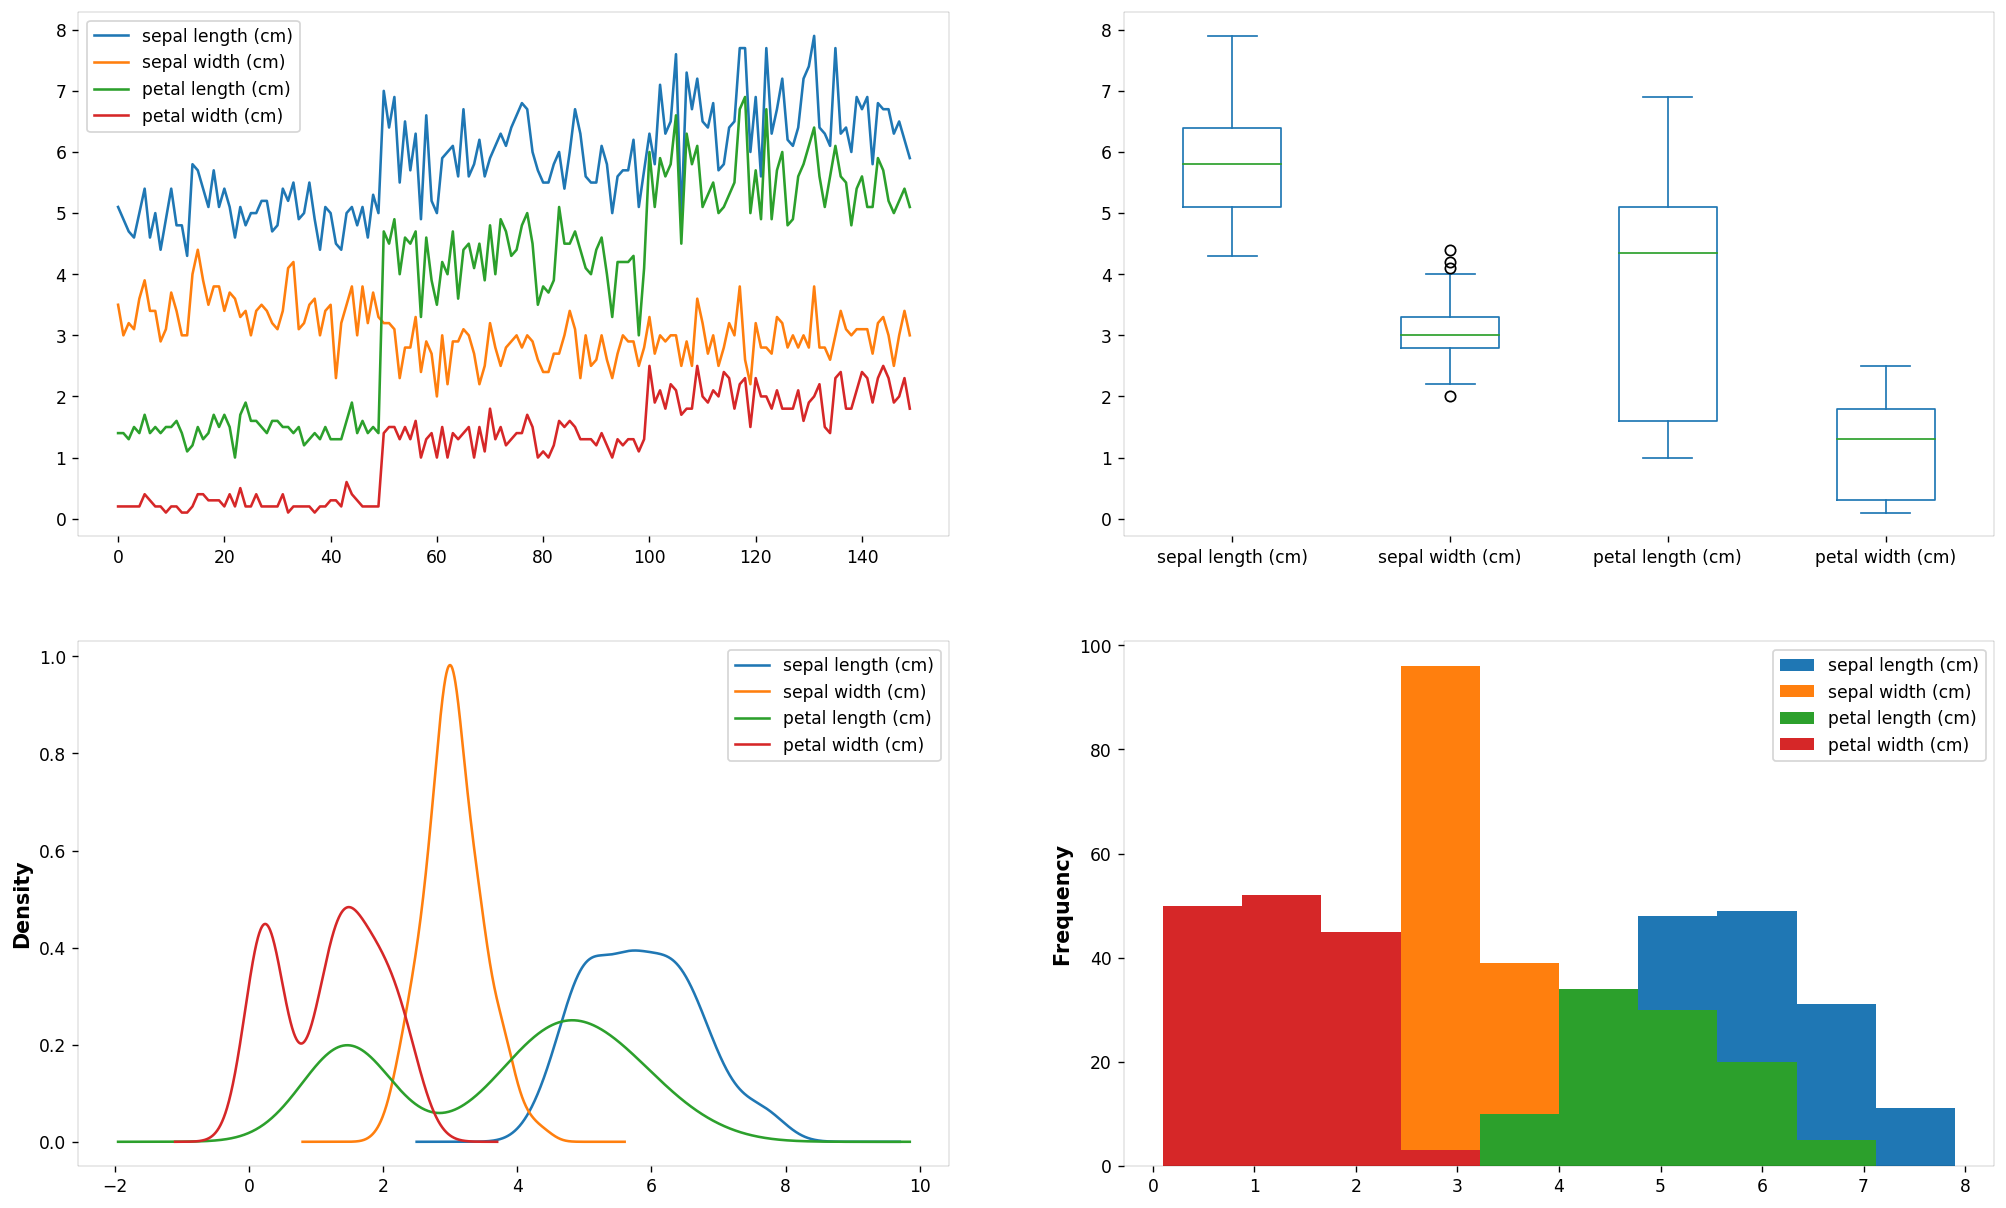

In [7]:
if draw_plot == 1:
    fig, axes = plt.subplots(nrows=2, ncols=2)

    fig.set_figheight(fig_height*2)
    fig.set_figwidth(fig_width*2)

    X.plot(kind='line',ax=axes[0,0])
    X.plot(kind='box',ax=axes[0,1])
    X.plot(kind='density',ax=axes[1,0])
    X.plot(kind='hist',ax=axes[1,1])
    plt.show()

## 3/ Data pre-processing
***

### Re-scaling the data
needed if we want to have a proper working algorithms.

In [24]:
scaler  = StandardScaler()
X       = scaler.fit_transform(X)
X       = pd.DataFrame(X)

### Visualisation of the changes in the statistics

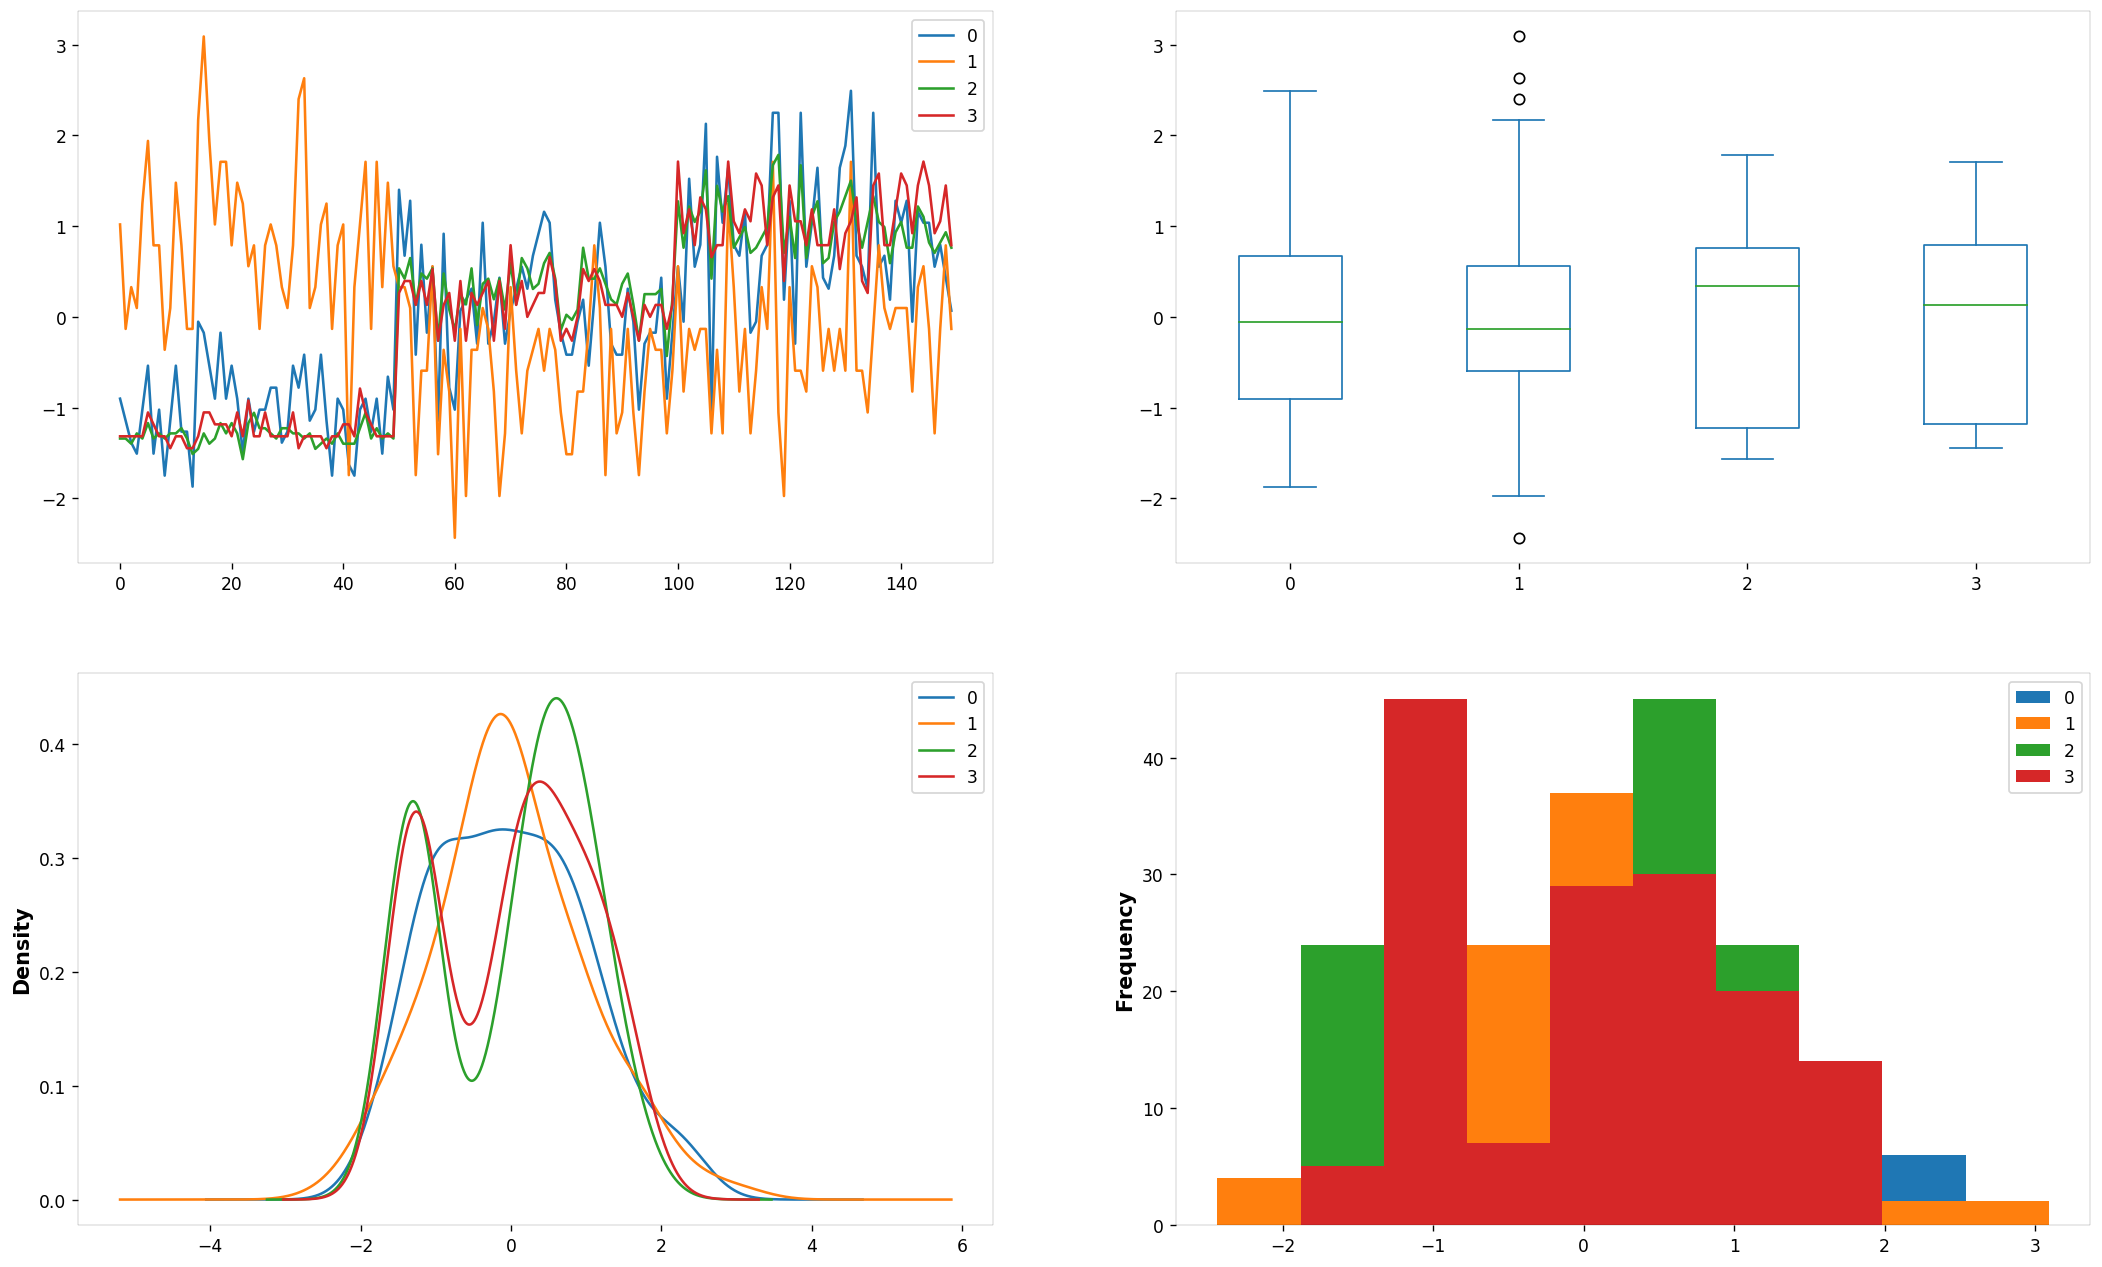

In [25]:
if draw_plot == 1:
    fig, axes = plt.subplots(nrows=2, ncols=2)

    fig.set_figheight(13)
    fig.set_figwidth(21)

    X.plot(kind='line',ax=axes[0,0])
    X.plot(kind='box',ax=axes[0,1])
    X.plot(kind='density',ax=axes[1,0])
    X.plot(kind='hist',ax=axes[1,1])

    plt.show()

### Splitting the datasets into train and test sub-datasets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)
y_test = np.array(y_test)

## 4/ Training
***

### a/ Support Vector Machine (SVM)

Specific packages

In [27]:
from sklearn import svm

Classifier definition

In [28]:
classifier_SVM  = OneVsRestClassifier(
    svm.SVC()
    )

Training

In [29]:
classifier_SVM.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC())

### b/ K-Nearest Neighbours (KNN)

Specific packages

In [30]:
from sklearn import neighbors

Classifier definition

In [31]:

classifier_KNN = neighbors.KNeighborsClassifier(n_neighbors=3)

Training

In [32]:
classifier_KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### c/ Multi-Layers Perceptron (MLP)

Specific package

In [33]:
from sklearn.neural_network import MLPClassifier

Classifier definition

In [34]:
# the solver for weight optimization
#   "lbfgs" = low-memory Broyden Fletcher Goldfarb Shanno method
#   "activation" = the activation function of the neurons
#   "alpha" = the regularisation parameter
#   "hidden layer size" = (number of hidden layers, number of neurons per layer)
# 

classifier_MLP = MLPClassifier(
    solver              = "lbfgs",
    activation          = "relu",
    alpha               = 1e-5,
    hidden_layer_sizes  = (5,2),
)

Training

In [35]:
classifier_MLP.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), solver='lbfgs')

## 5/ Evaluation
***

Predictions using `predict` function

In [36]:
predictions_SVM     = classifier_SVM.predict(X_test)
predictions_KNN     = classifier_KNN.predict(X_test)
predictions_MLP     = classifier_MLP.predict(X_test)

Displaying the confusion matrix using the `plot_confusion_matirx` function

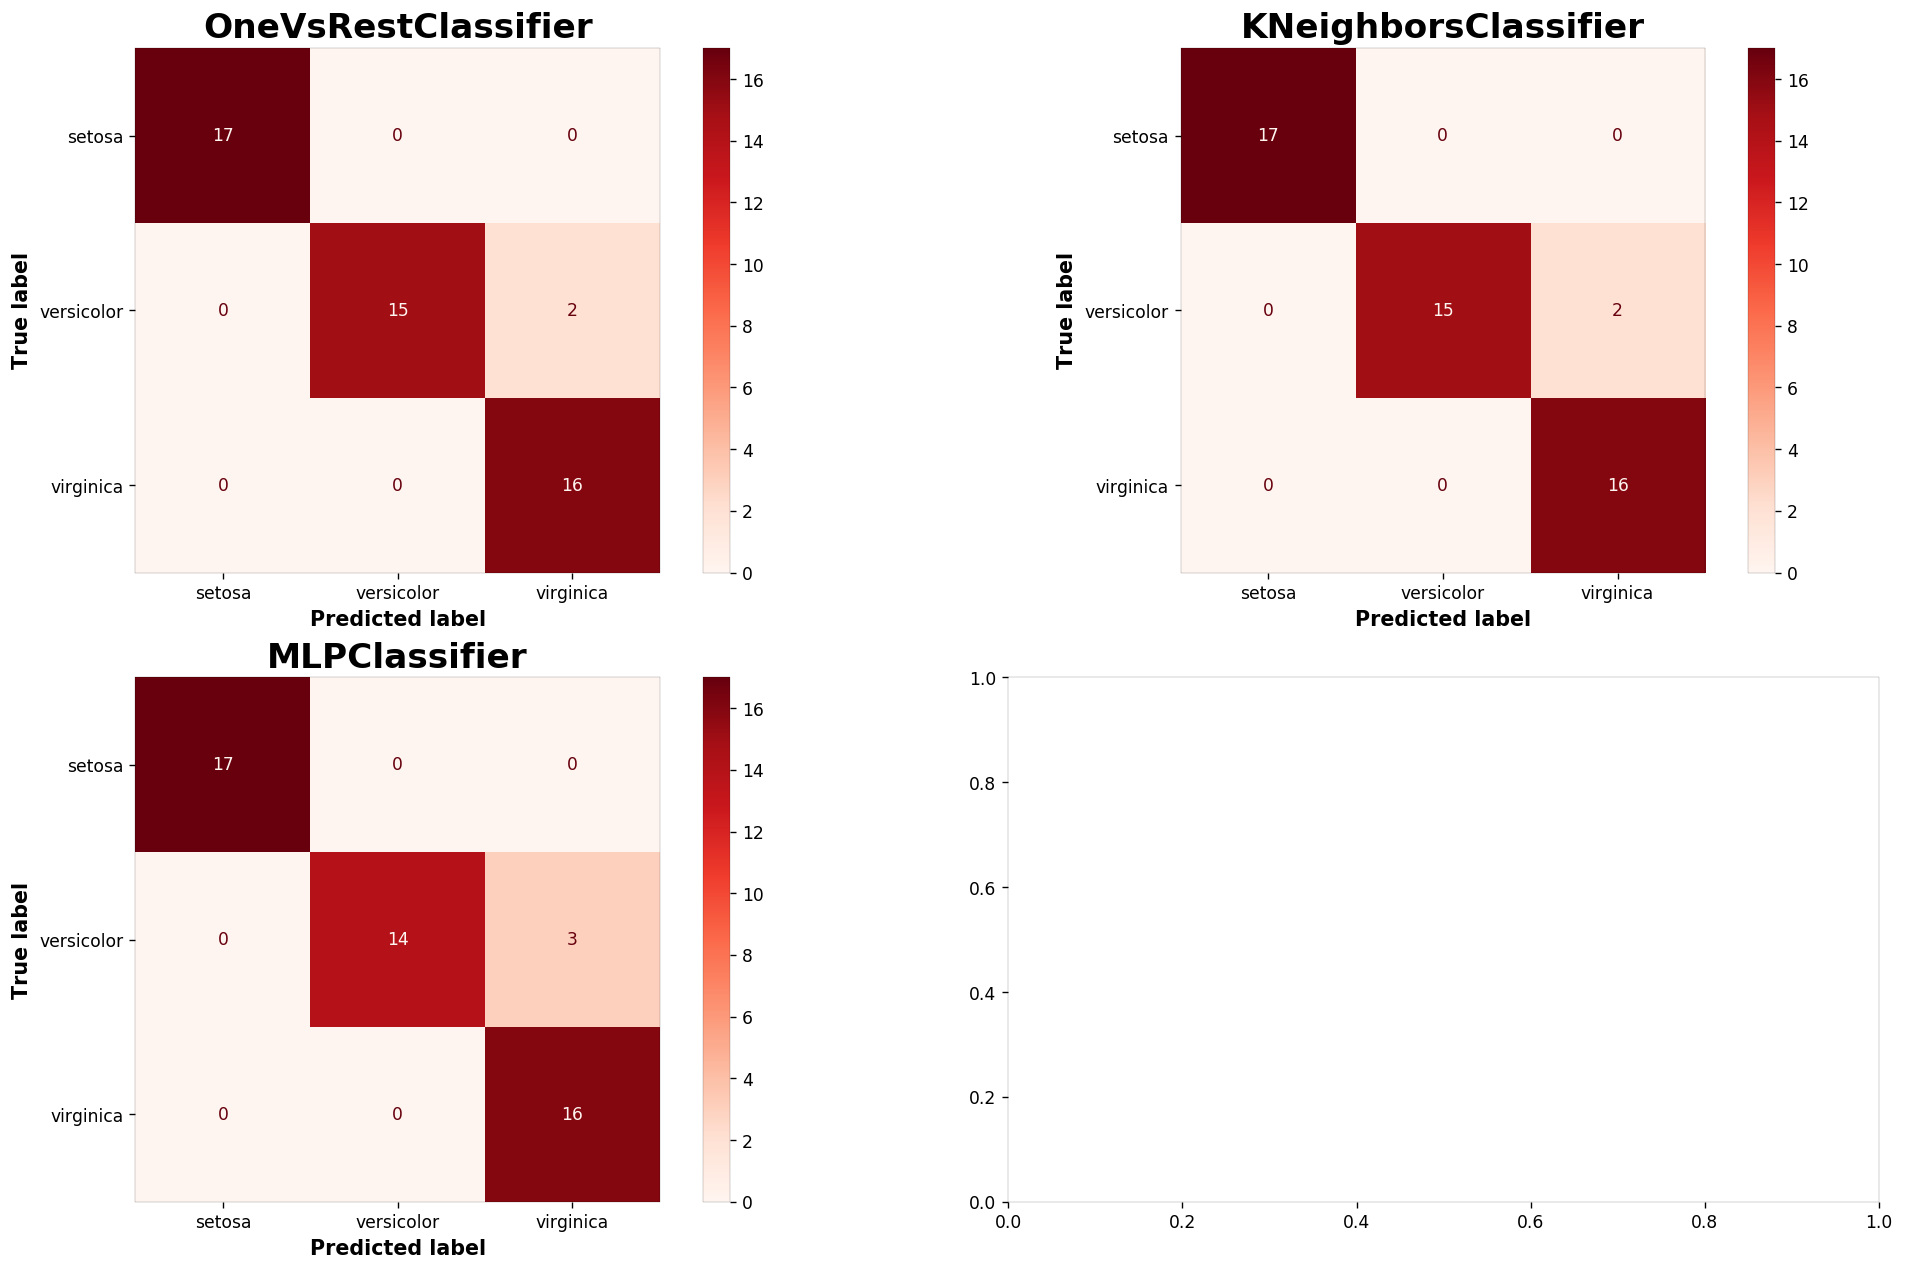

In [37]:
fig, axes   = plt.subplots(nrows=2, ncols=2, figsize=(fig_width*2,fig_height*2))
classifiers = [classifier_SVM,classifier_KNN,classifier_MLP]

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(
                        cls, 
                        X_test, 
                        y_test, 
                        ax              = ax, 
                        cmap            = 'Reds',
                        display_labels  = class_names)
    ax.title.set_text(type(cls).__name__)
plt.show()

Calculating the classic metrics values using the `accuracy`, `precision`, `recall` and `f1` functions

In [38]:
Acc_SVM = np.round(accuracy(y_test,predictions_SVM),3)
Acc_KNN = np.round(accuracy(y_test,predictions_KNN),3)
Acc_MLP = np.round(accuracy(y_test,predictions_MLP),3)

Pre_SVM = np.round(precision(y_test,predictions_SVM,average="macro"),3)
Pre_KNN = np.round(precision(y_test,predictions_KNN,average="macro"),3)
Pre_MLP = np.round(precision(y_test,predictions_MLP,average="macro"),3)

Rcl_SVM = np.round(recall(y_test,predictions_SVM,average="macro"),3)
Rcl_KNN = np.round(recall(y_test,predictions_KNN,average="macro"),3)
Rcl_MLP = np.round(recall(y_test,predictions_MLP,average="macro"),3)

F1_SVM  = np.round(f1(y_test,predictions_SVM,average="macro"),3)
F1_KNN  = np.round(f1(y_test,predictions_KNN,average="macro"),3)
F1_MLP  = np.round(f1(y_test,predictions_MLP,average="macro"),3)

Acc = ["Accuracy",Acc_SVM,Acc_KNN,Acc_MLP]
Rcl = ["Recall",Rcl_SVM,Rcl_KNN,Rcl_MLP]
Pre = ["Precision",Pre_SVM,Pre_KNN,Pre_MLP]
F1  = ["F1",F1_SVM,F1_KNN,F1_MLP]

Finally we have the classic metric values and we show it in a DataFrame

In [39]:
Metrics          = pd.DataFrame(np.zeros((3,4)))
Metrics.columns  = ["metric","SVM","KNN","MLP"]

Metrics.loc[0]   = Acc
Metrics.loc[1]   = Rcl
Metrics.loc[2]   = Pre
Metrics.loc[3]   = F1

Metrics

,metric,SVM,KNN,MLP
0,Accuracy,0.960,0.960,0.940
1,Recall,0.961,0.961,0.941
2,Precision,0.963,0.963,0.947
3,F1,0.960,0.960,0.939
